In [1]:
pip install tensorflow

In [2]:
#when full data set are being forward and backwardly being propogated is called Epochs
#Glurot/Xavior

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from sklearn.preprocessing import LabelBinarizer
import keras

In [5]:
def load_mnist(flatten=False):
  (X_train, Y_train), (X_test,Y_test)=keras.datasets.mnist.load_data()
  print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
  #normalisation --> between 0 to 1
  X_train=X_train.astype(float)/255
  X_test=X_test.astype(float)/255

  #data seperation
  X_train=X_train[ :-10000]
  X_val=X_train[-10000: ]
  Y_train=Y_train[ :-10000]
  Y_val=Y_train[-10000: ]
  print(X_val.shape,Y_val.shape)

  if flatten:
    X_train=X_train.reshape([X_train.shape[0],-1])
    X_val=X_val.reshape([X_val.shape[0],-1])
    X_test=X_test.reshape([X_val.shape[0],-1])
  return X_train,Y_train,X_val,Y_val,X_test,Y_test


In [6]:
X_train,Y_train,X_val,Y_val,X_test,Y_test=load_mnist()


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


5


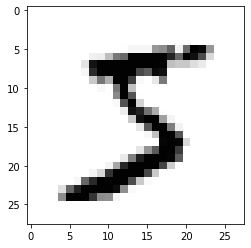

In [7]:
print(Y_train[0])
plt.imshow(X_train[0],cmap="Greys")

1


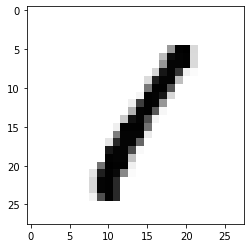

In [8]:
print(Y_train[3])
plt.imshow(X_train[3],cmap="Greys")

3


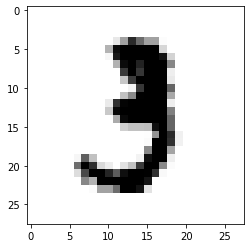

In [9]:
print(Y_train[10])
plt.imshow(X_train[10],cmap="Greys")

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train.shape

(50000, 28, 28)

## Changing dimension of input from N* 28 * 28 to N*784

In [12]:
28*28

784

In [13]:
X_train.shape[2]

28

In [14]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))




In [15]:
X_train.shape

(50000, 784)

In [16]:
Y_train=LabelBinarizer().fit_transform(Y_train)
Y_test=LabelBinarizer().fit_transform(Y_test)

In [17]:
print(Y_train.shape,Y_test.shape)

(50000, 10) (10000, 10)


In [33]:
num_classes=Y_train.shape[1]
num_features=X_train.shape[1]
num_output=Y_train.shape[1]
num_layers_0=512
num_layers_1=256
start_learning_rate=0.001
regularizer_rate=0.1

In [34]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [35]:
input_X=tf.placeholder("float32",shape=(None,num_features),name="input_X")
input_Y=tf.placeholder("float32",shape=(None,num_classes),name="input_Y")
keep_prob=tf.placeholder(tf.float32)

In [36]:
#input_layer
weight_0=tf.Variable(tf.random_normal([num_features,num_layers_0],stddev=1/tf.sqrt(float(num_features))))
bias_0=tf.Variable(tf.random_normal([num_layers_0]))

#hidden_layer
weight_1=tf.Variable(tf.random_normal([num_layers_0,num_layers_1],stddev=1/tf.sqrt(float(num_layers_0))))
bias_1=tf.Variable(tf.random_normal([num_layers_1]))

#output_layer
weight_2=tf.Variable(tf.random_normal([num_layers_1,num_output],stddev=1/tf.sqrt(float(num_layers_1))))
bias_2=tf.Variable(tf.random_normal([num_output]))


In [37]:
hidden_output_0=tf.nn.relu(tf.matmul(input_X,weight_0)+bias_0)
hidden_output_0_0=tf.nn.dropout(hidden_output_0,keep_prob)

hidden_output_1=tf.nn.relu(tf.matmul(hidden_output_0_0,weight_1)+bias_1)
hidden_output_1_1=tf.nn.dropout(hidden_output_1,keep_prob)

predicted_y=tf.sigmoid(tf.matmul(hidden_output_1_1,weight_2)+bias_2)



In [38]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_Y))+ regularizer_rate*(tf.reduce_sum(tf.square(bias_0))*tf.reduce_sum(tf.square(bias_1)) )


In [39]:
learning_rate=tf.train.exponential_decay(start_learning_rate,0,5,0.85,staircase=True)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weight_0,weight_1,weight_2,bias_0,bias_1,bias_2])


In [40]:
correct_prediction=tf.equal(tf.argmax(Y_train,1),tf.argmax(predicted_y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [41]:
batch_size=128
epochs=14
dropout_prob=0.6


In [42]:
training_accuracy=[]
training_loss=[]
testing_accuracy=[]

In [43]:
s=tf.InteractiveSession()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [44]:
from sklearn.metrics import accuracy_score

In [30]:
# s.run(tf.global_variables_initializer())
# for epoch in range(epochs):
#   arr=np.arange(X_train.shape[0])
#   np.random.shuffle(arr)
#   for index in range(0,X_train.shape[0],batch_size):
#     s.run(optimizer,{input_X:X_train[arr[index:index+batch_size]],input_Y:Y_train[arr[index:index+batch_size]],keep_prob:dropout_prob})

#     training_accuracy.append(s.run(accuracy,feed_dict={input_X:X_train,input_Y:Y_train,keep_prob:1}))
#     testing_accuracy.append(accuracy_score(Y_test.argmax(1),s.run(predicted_y,{input_X:X_test,keep_prob:1}).argmax(1)))
#     training_loss.append(s.run(loss,{input_X:X_train,input_Y:Y_train,keep_prob:1}))
#     print("Epochs:{0},train loss:{1:2f},Train accu:{2:3f},Test acc:{3:3f}",format(epoch,training_loss[epoch],training_accuracy[epoch],testing_accuracy[epoch]))

In [45]:
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_Y: Y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_Y: Y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_Y: Y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Epoch:0, Train loss: 3865.84 Train acc: 0.936, Test acc:0.939
Epoch:1, Train loss: 1685.44 Train acc: 0.956, Test acc:0.952
Epoch:2, Train loss: 850.39 Train acc: 0.967, Test acc:0.961
Epoch:3, Train loss: 470.63 Train acc: 0.974, Test acc:0.966
Epoch:4, Train loss: 277.44 Train acc: 0.979, Test acc:0.972
Epoch:5, Train loss: 171.15 Train acc: 0.981, Test acc:0.973
Epoch:6, Train loss: 109.23 Train acc: 0.983, Test acc:0.975
Epoch:7, Train loss: 71.58 Train acc: 0.986, Test acc:0.976
Epoch:8, Train loss: 47.93 Train acc: 0.986, Test acc:0.974
Epoch:9, Train loss: 32.69 Train acc: 0.986, Test acc:0.974
Epoch:10, Train loss: 22.67 Train acc: 0.989, Test acc:0.978
Epoch:11, Train loss: 15.97 Train acc: 0.990, Test acc:0.979
Epoch:12, Train loss: 11.45 Train acc: 0.990, Test acc:0.978
Epoch:13, Train loss: 8.37 Train acc: 0.990, Test acc:0.978
